<a href="https://colab.research.google.com/github/aliobeid/training/blob/master/Validaiton_of_Binary_Classification_Models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Validaiton of Binary Classification Models
*Author: Ali Obeid*



## Validation tests and metrics
Various measures of the models performance are typically used to diagnose the model depending on what parts of table above have a priority for the business problem this model is set to solve


## Confusion matrix
The results of a binary classification model can be summarized in a so-called confusion matrix for a specific probability cut-off.


\begin{array}{|c|c|c|} \hline
Number\, of \,cases & Predicted\,class\,1 & Predicted\,class\,0 \\ \hline
True\,class\,1 & True\,positive (TP) & False\,Positive(FP) \\ \hline
True\,class\,0& False\,negative (FN) & true\, negative (TN)\\ \hline
\end{array}

**Condition positive (P)** the number of real positive cases in the data

**Condition negative (N)** the number of real negative cases in the data

**True positive (TP)** eqv. with hit

**True negative (TN)** eqv. with correct rejection

**False positive (FP)** eqv. with false alarm,** Type I error**

**False negative (FN)** eqv. with miss, **Type II error**





* **Sensitivity, recall, hit rate, or true positive rate** ${\displaystyle \mathrm {TPR} ={\frac {\mathrm {TP} }{P}}={\frac {\mathrm {TP} }{\mathrm {TP} +\mathrm {FN} }}=1-\mathrm {FNR} }$

* **Specificity, selectivity or true negative rate** ${\displaystyle  \mathrm {TNR} ={\frac {\mathrm {TN} }{N}}={\frac {\mathrm {TN} }{\mathrm {TN} +\mathrm {FP} }}=1-\mathrm {FPR} }$

* **Precision or positive predictive value** ${\displaystyle \mathrm {PPV} ={\frac {\mathrm {TP} }{\mathrm {TP} +\mathrm {FP} }}=1-\mathrm {FDR} }$

* **Miss rate or false negative rate (FNR)** ${\displaystyle \mathrm {FNR} ={\frac {\mathrm {FN} }{P}}={\frac {\mathrm {FN} }{\mathrm {FN} +\mathrm {TP} }}=1-\mathrm {TPR} }$



## Common Evaluation metrics

* **Accuracy (ACC)**  the number of correct predictions relative to number of observations. A very biased metric since it ignores the false positives $${\displaystyle \mathrm {ACC} ={\frac {\mathrm {TP} +\mathrm {TN} }{P+N}}={\frac {\mathrm {TP} +\mathrm {TN} }{\mathrm {TP} +\mathrm {TN} +\mathrm {FP} +\mathrm {FN} }}}$$

* **F1 score** is the harmonic mean of precision and sensitivity $${\displaystyle F_{1}=2\cdot {\frac {\mathrm {PPV} \cdot \mathrm {TPR} }{\mathrm {PPV} +\mathrm {TPR} }}={\frac {2\mathrm {TP} }{2\mathrm {TP} +\mathrm {FP} +\mathrm {FN} }}}$$


* **Reciever Operating Characteristic (ROC) Curve ** given a threshold parameter  $T$, the observation is classified as "positive" if  $ X>T$, and "negative" otherwise. $ X $ follows a probability density $f_1 (x) $ if the observation actually belongs to class "positive", and $f_0 (x)$ if otherwise. Therefore, the true positive rate is given by $ \mbox{TPR}(T)= \int_{T}^\infty f_1(x) \, dx $ and the false positive rate is given by $ \mbox{FPR}(T)= \int_{T}^\infty f_0(x) \, dx $. 
The ROC curve plots parametrically TPR(T) versus FPR(T) with T as the varying parameter.

* **Area under ROC Curve (AUCROC)** also called **c-index**  is equal to the probability that a classifier will rank a randomly chosen positive instance higher than a randomly chosen negative one 
$${\displaystyle AUC=\int _{x=0}^{1}{\mbox{TPR}}({\mbox{FPR}}^{-1}(x))\,dx=\int _{\infty }^{-\infty }{\mbox{TPR}}(T){\mbox{FPR}}'(T)\,dT=\int _{-\infty }^{\infty }\int _{-\infty }^{\infty }I(T'>T)f_{1}(T')f_{0}(T)\,dT'\,dT=P(X_{1}>X_{0})}$$
in terms of the **Mann-Whitney U**
$${\displaystyle \mathrm {AUC} ={U \over P \cdot N}}$$

 we can define the **Gini Coefficient ** in terms of AUC $$ G=2{\mbox{AUC}}-1 $$
 
 
 
* ** Brier (Quadratic) Score** asseses the the error between the modelled probability and the actual outcome 
$$ BS = \frac{1}{N}\sum\limits _{t=1}^{N}(p_t-y_t)^2 \, $$
where $p$ is the probability of observation $t$ and $y$ is the actual outcome. $N$ is the total number of observations. Notice the similarity to the **Mean Square Error**







## Metrics robust to unbalanced class distributions (Rare events modelling)

the above metrics can be over optemistic in regards to unbalanced datasets where the number of positive is much larger than negative. The **Matthews correlation coefficient (MCC)** tends to be robust to such cases $${\displaystyle \mathrm {MCC} ={\frac {\mathrm {TP} \times \mathrm {TN} -\mathrm {FP} \times \mathrm {FN} }{\sqrt {(\mathrm {TP} +\mathrm {FP} )(\mathrm {TP} +\mathrm {FN} )(\mathrm {TN} +\mathrm {FP} )(\mathrm {TN} +\mathrm {FN} )}}}}$$

MCC is related to the chi-square statistic for a 2×2 contingency table $$|\text{MCC}| = \sqrt{\frac{\chi^2}{n}}$$

## Example 1: Logistic Regression
### Importing libraries

In [ ]:
!pip install scikit-plot

In [ ]:

import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [10, 7]
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, matthews_corrcoef,brier_score_loss
import scikitplot as skplt
import sys
print("Python version:",sys.version)

Python version: 3.6.7 (default, Oct 22 2018, 11:32:17) 
[GCC 8.2.0]


###Generating synthetic data

**X** as a 4000 by 2 matrix representing two input variables and 4000 observations

**y** as binary response variable

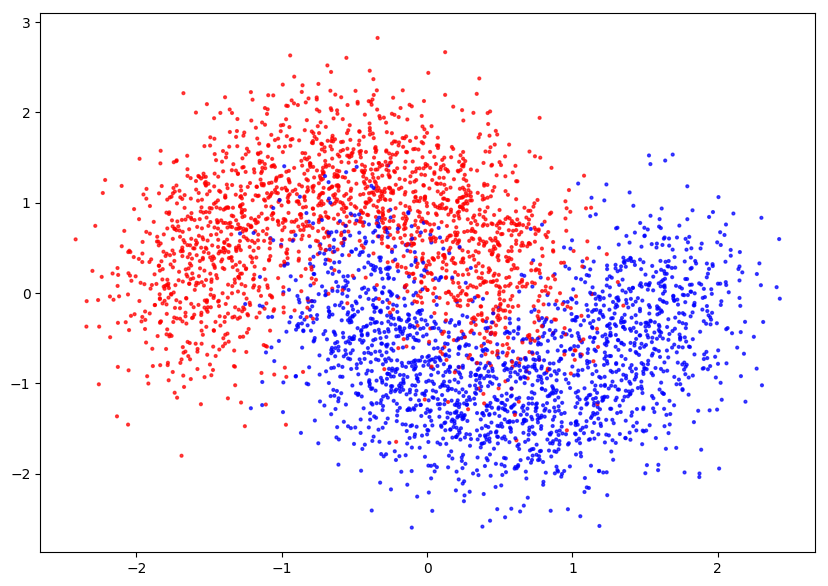

In [ ]:

X, y =make_moons(n_samples=4000,noise=0.3, random_state=0)
X = StandardScaler().fit_transform(X)

#split the data into training and validation(test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.4, random_state=42)


#plot the data
plt.style.use('default')
plt.rcParams['figure.figsize'] = [10, 7]
cm_bright = ListedColormap(['#FF0000', '#0000FF'])
plt.scatter(X[:, 0], X[:, 1], c=y, s=4, cmap=cm_bright, alpha=0.7)



In [ ]:
type(X)

numpy.ndarray

In [ ]:
y.shape

(4000,)

### Defining the model

In [ ]:
model=LogisticRegression(solver='lbfgs').fit(X_train, y_train)

### Plotting decision boundry and validation results

In [ ]:
def plot_decision_boundary(model,X,y):
    plt.rcParams['figure.figsize'] = [10, 7]
    cm = plt.cm.RdBu
    cm_bright = ListedColormap(['#FF0000', '#0000FF'])
    h = .02  # step size in the mesh
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                             np.arange(y_min, y_max, h))
    Z = model.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]

     # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    ax=plt.contourf(xx, yy, Z,10, cmap=cm, alpha=.8)
    ax=plt.colorbar()

    # Plot data
    ax=plt.scatter(X[:, 0], X[:, 1], c=y, s=4, cmap=cm_bright, alpha=0.7)
   
    #plt.tight_layout()
    print("Accuracy:",model.score(X_test, y_test))
    print("Brier:",brier_score_loss(y_test, model.predict_proba(X_test)[:,1],pos_label=1)) 
    print("AUROC:",roc_auc_score(y_test, model.predict_proba(X_test)[:,1])) 
    print("Gini:",2*roc_auc_score(y_test, model.predict_proba(X_test)[:,1])-1) 
    print("Matthews correlation coefficient (MCC):",matthews_corrcoef(y_test, model.predict(X_test)))  
    plt.show()

Accuracy: 0.86625
Brier: 0.09702664354781469
AUROC: 0.9396043642774421
Gini: 0.8792087285548842
Matthews correlation coefficient (MCC): 0.7324293446238147


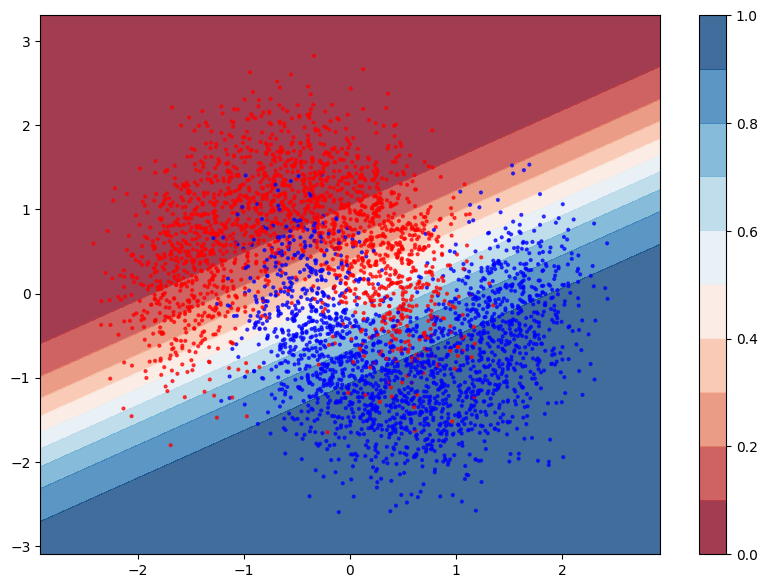

In [ ]:
plot_decision_boundary(model,X,y)

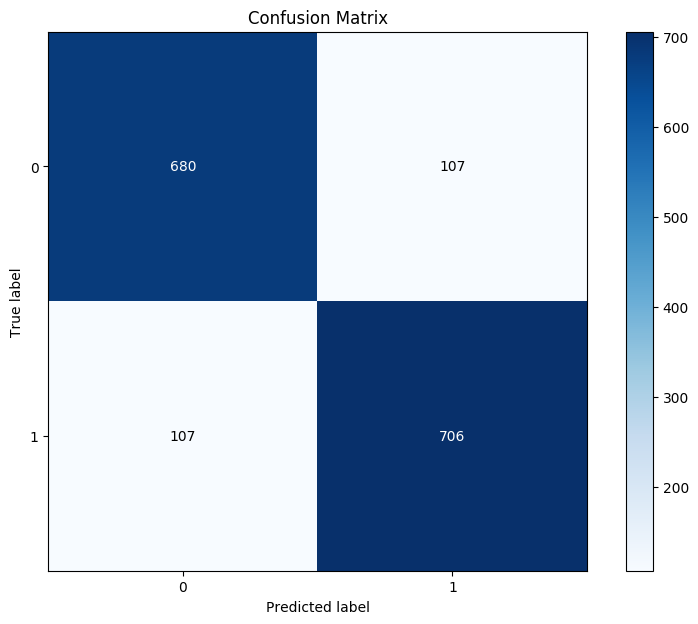

In [ ]:
skplt.metrics.plot_confusion_matrix(y_test, model.predict(X_test))

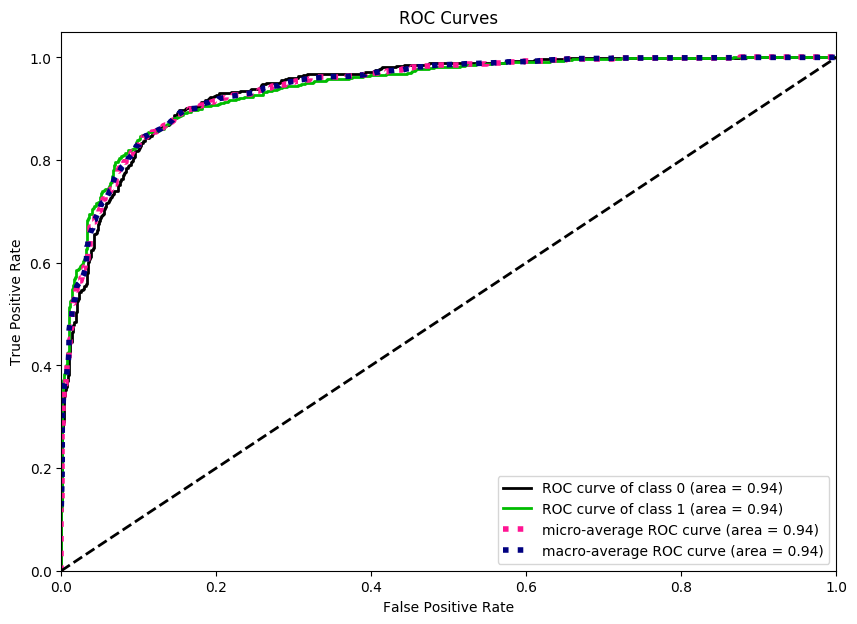

In [ ]:
skplt.metrics.plot_roc(y_test, model.predict_proba(X_test))


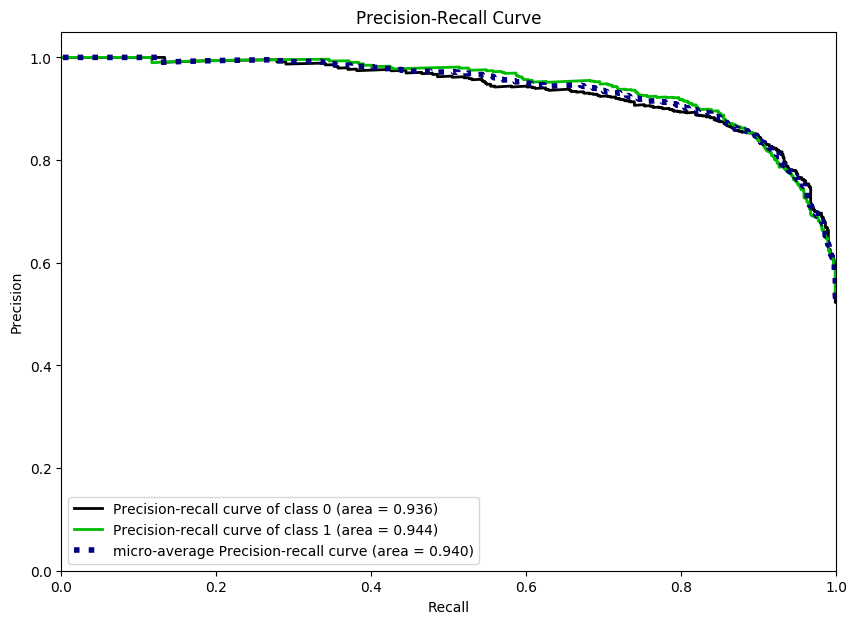

In [ ]:
skplt.metrics.plot_precision_recall(y_test,  model.predict_proba(X_test))

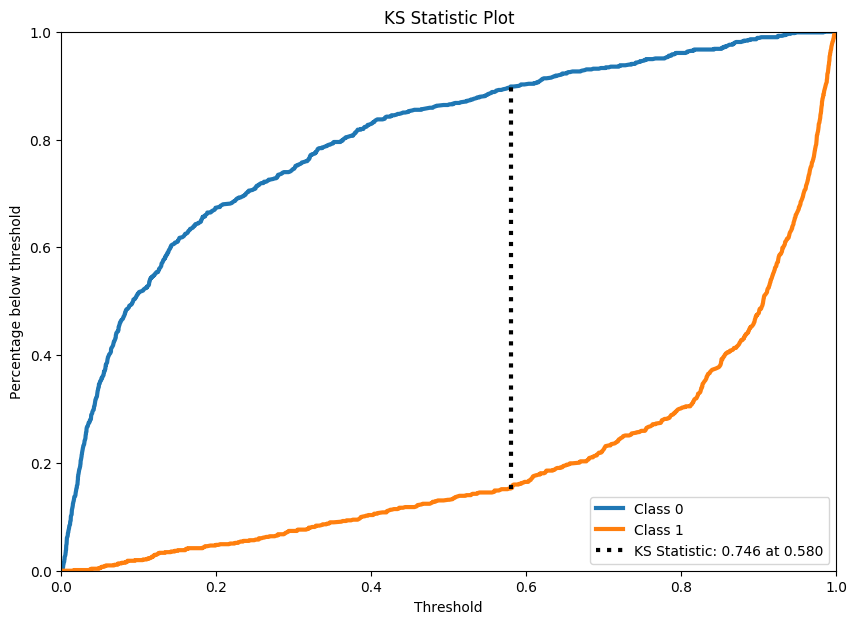

In [ ]:
skplt.metrics.plot_ks_statistic(y_test, model.predict_proba(X_test))

### Calibration curve

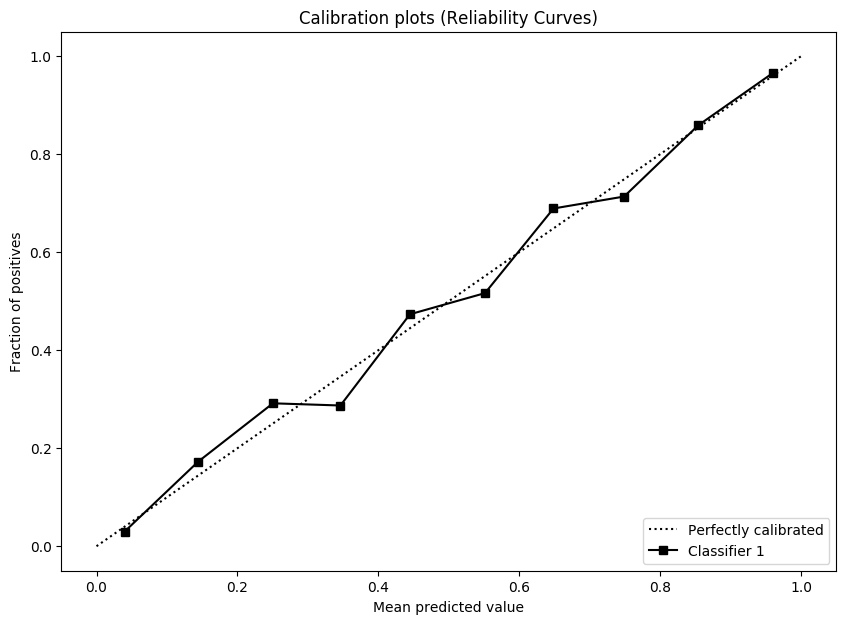

In [ ]:
skplt.metrics.plot_calibration_curve(y, [model.predict_proba(X)],n_bins=10)

##Example 2: Neural Net with one hidden layer and three nodes


### Defining the model

In [ ]:
nn2=MLPClassifier(hidden_layer_sizes=(3,),
                 alpha=0.02, 
                 max_iter=100000000, 
                 solver='lbfgs',
                 activation='tanh',
                 verbose=False).fit(X_train, y_train)

### Plotting decision boundry and validation results

Accuracy: 0.9773809523809524
AUROC: 0.9584687500000001
Gini: 0.9169375000000002
Matthews correlation coefficient (MCC): 0.731699101770854


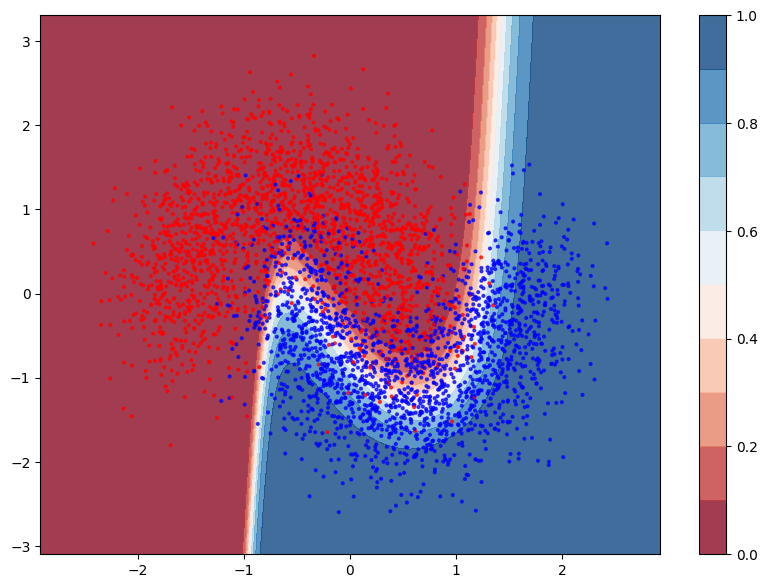

In [ ]:
plot_decision_boundary(nn2,X,y)

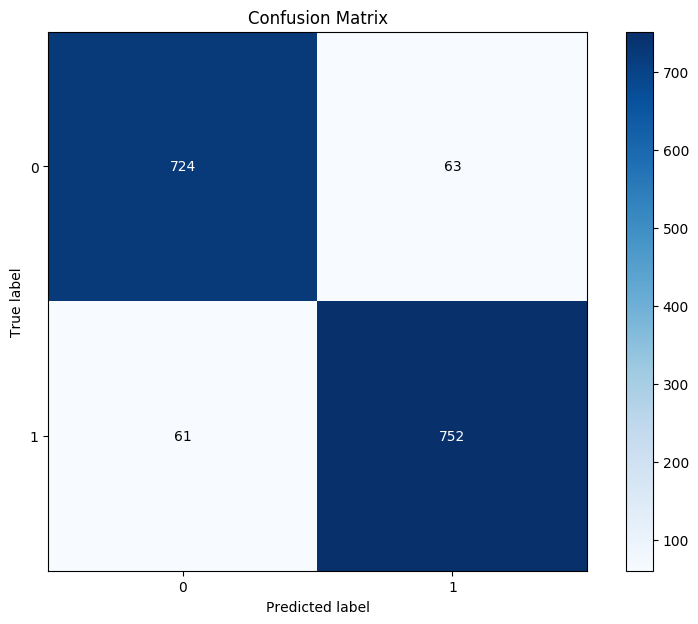

In [ ]:
y_probas =nn2.predict_proba(X_test)
y_pred = nn2.predict(X_test)
skplt.metrics.plot_confusion_matrix(y_test, y_pred)

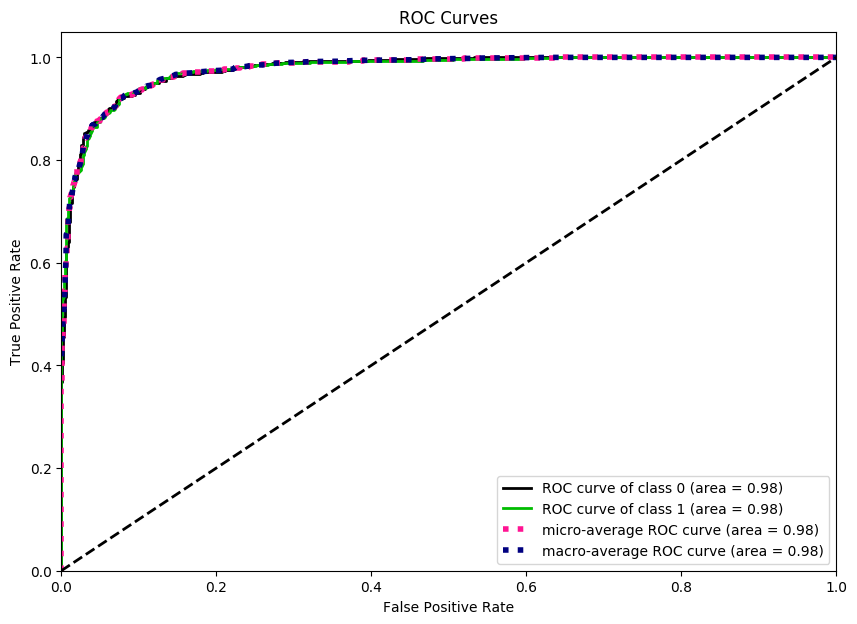

In [ ]:
skplt.metrics.plot_roc(y_test, y_probas)

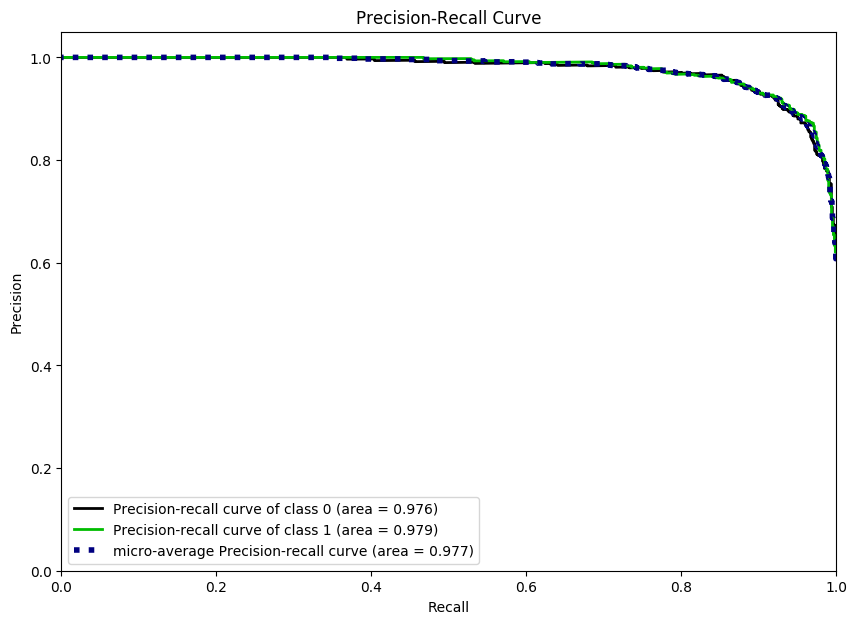

In [ ]:
skplt.metrics.plot_precision_recall(y_test, y_probas)

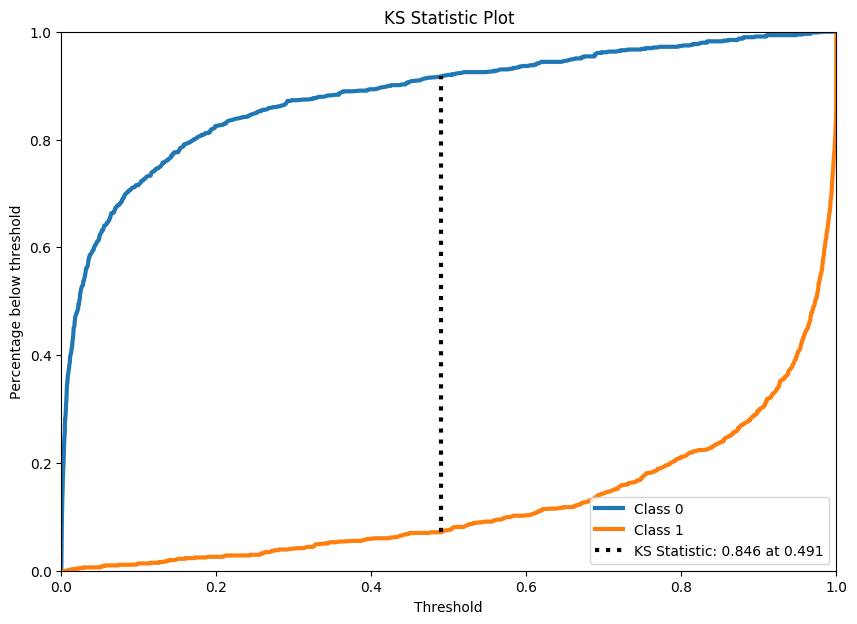

In [ ]:
skplt.metrics.plot_ks_statistic(y_test, y_probas)

### Calibration curve

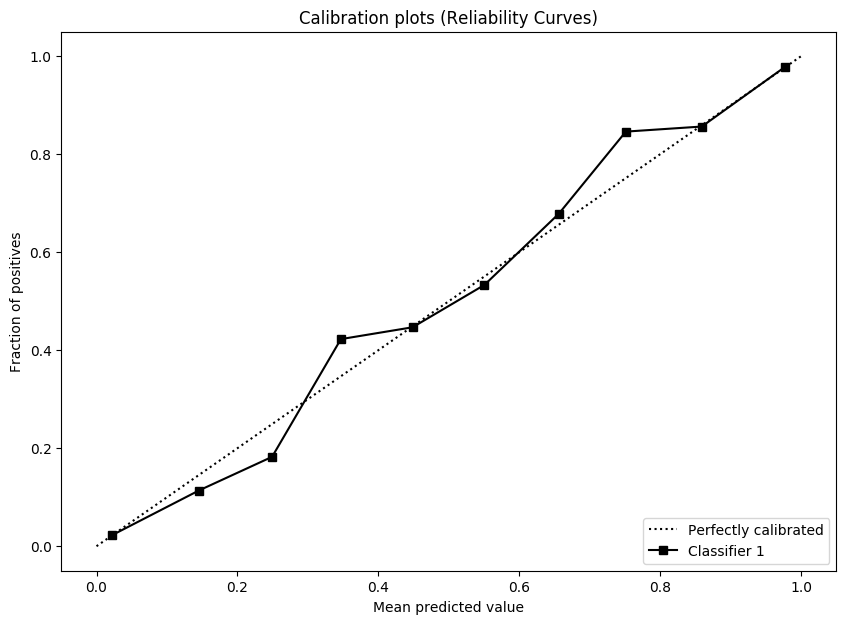

In [ ]:
skplt.metrics.plot_calibration_curve(y, [nn2.predict_proba(X)],n_bins=10)